In [1]:
import numpy as np
import pandas as pd

In [2]:
import ray
ray.init()

2022-11-08 16:16:20,206	INFO worker.py:1518 -- Started a local Ray instance.


Python version:,3.9.5
Ray version:,2.0.1


In [3]:
data2020 = pd.read_csv("20220727_covid_159rows_52cols_2020.csv")
#data2020["year"] = 2020
data2021 = pd.read_csv("20220727_covid_159rows_52cols_2021.csv")
#data2021["year"] = 2021

In [4]:
data2020.head()

,location,new_cases_per_million,new_deaths_per_million,stringency_index_cov,population_density_cov,population_cov,median_age_cov,aged_65_older_cov,aged_70_older_cov,gdp_per_capita_cov,...,Chronic kidney disease,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,Acute hepatitis,Alzheimer's disease and other dementias,Parkinson's disease,Total_death_ratio,air_polution,Obesity_rate
0,Afghanistan,1313.661,54.938,47.626442,54.422,39835428.0,18.6,2.581,1.337,1803.987,...,0.015165,0.019052,0.010215,0.018640,0.005219,0.004775,0.001507,0.585498,52.99812,5.5
1,Albania,20298.412,411.043,64.760836,104.871,2872934.0,38.0,13.188,8.643,11803.431,...,0.011413,0.028272,0.011552,0.018281,0.000035,0.031810,0.008603,0.771315,18.45981,21.7
2,Algeria,2232.574,61.762,70.767717,17.348,44616626.0,29.1,6.211,3.857,13913.839,...,0.019421,0.017827,0.009579,0.015151,0.000613,0.012335,0.003038,0.455347,32.91557,27.4
3,Angola,517.274,11.899,73.326934,23.890,33933611.0,16.8,2.405,1.362,5819.495,...,0.007997,0.012769,0.018390,0.029117,0.000798,0.003710,0.000867,0.562613,28.02152,8.2
4,Argentina,35642.693,948.224,71.530603,16.177,45605823.0,31.9,11.198,7.441,18933.907,...,0.035312,0.043615,0.019217,0.040107,0.000081,0.027152,0.006860,0.759791,13.84671,28.3


In [5]:
columns_2020 = data2020.columns.to_list()
columns_2021 = data2021.columns.to_list()
print(len(columns_2020), len(columns_2021))

52 51


In [6]:
only_2020 = list(set(columns_2020)-set(columns_2021))
only_2021 = list(set(columns_2021)-set(columns_2020))
print("only 2020: ", only_2020)
print("only 2021: ", only_2021)

only 2020:  ['human_development_index_cov', 'stringency_index_cov', 'aged_70_older_cov', 'cardiovasc_death_rate_cov', 'aged_65_older_cov']
only 2021:  ['total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'total_deaths_per_million', 'people_fully_vaccinated_per_hundred']


In [7]:
from bin.main import predictability, get_column_combinations

In [8]:
all_2020 = columns_2020.copy()
all_2020.remove("location")
all_2020.remove("Year_x")
all_2021 = columns_2021.copy()
all_2021.remove("location")
all_2021.remove("Year_x")

## Check covid data combinations

### Find targets

In [9]:
all_2020

['new_cases_per_million',
 'new_deaths_per_million',
 'stringency_index_cov',
 'population_density_cov',
 'population_cov',
 'median_age_cov',
 'aged_65_older_cov',
 'aged_70_older_cov',
 'gdp_per_capita_cov',
 'cardiovasc_death_rate_cov',
 'diabetes_prevalence_cov',
 'life_expectancy_cov',
 'human_development_index_cov',
 'Population',
 'Area_km2',
 'Density_km2',
 'Meningitis',
 'Neoplasms',
 'Fire, heat, and hot substances',
 'Malaria',
 'Drowning',
 'Interpersonal violence',
 'HIV/AIDS',
 'Drug use disorders',
 'Tuberculosis',
 'Road injuries',
 'Maternal disorders',
 'Lower respiratory infections',
 'Neonatal disorders',
 'Alcohol use disorders',
 'Exposure to forces of nature',
 'Diarrheal diseases',
 'Environmental heat and cold exposure',
 'Nutritional deficiencies',
 'Self-harm',
 'Conflict and terrorism',
 'Diabetes mellitus',
 'Poisonings',
 'Protein-energy malnutrition',
 'Cardiovascular diseases',
 'Chronic kidney disease',
 'Chronic respiratory diseases',
 'Cirrhosis and 

In [10]:
len(get_column_combinations(all_cols=all_2020, inputs=3, outputs=1, targets=["new_cases_per_million", "new_deaths_per_million",]))

34592

## Run predictability

In [ ]:
metrics_dict, datas_dict = predictability(data=data2020, input_cols=3, output_cols=1, targets=["new_cases_per_million", "new_deaths_per_million",], primkey_cols=["location", "Year_x"], method="kNN", scoring="RMSE", n_jobs=-1, random_state_split=None)

In [2]:
import pickle

In [ ]:
'''
with open('metrics_covid_2020_52cols.pickle', 'wb') as file:
    pickle.dump(metrics_dict, file)

with open('datas_covid_2020_52cols.pickle', 'wb') as file:
    pickle.dump(datas_dict, file)
    '''

In [3]:
with open('metrics_covid_2020_52cols.pickle', 'rb') as file:
    metrics_dict = pickle.load(file)
with open('datas_covid_2020_52cols.pickle', 'rb') as file:
    datas_dict = pickle.load(file)

In [18]:
metrics_df = pd.DataFrame.from_dict(metrics_dict).transpose().sort_values(by="kNN r2", ascending=False)

In [19]:
metrics_df.head(20)

kNN r2  \
population_cov              Drug use disorders          Alzheimer's disease and other dementias new_deaths_per_million  0.689137   
median_age_cov              Protein-energy malnutrition Cardiovascular diseases                 new_deaths_per_million  0.672013   
aged_70_older_cov           Density_km2                 Alzheimer's disease and other dementias new_cases_per_million   0.668209   
Drowning                    Nutritional deficiencies    Parkinson's disease                     new_cases_per_million   0.666848   
Density_km2                 Interpersonal violence      Obesity_rate                            new_deaths_per_million  0.665432   
aged_70_older_cov           air_polution                Obesity_rate                            new_cases_per_million   0.665119   
                            Density_km2                 Exposure to forces of nature            new_deaths_per_million  0.663870   
Area_km2                    Parkinson's disease         Obesity_rate                            new_cases_per_million   0.663404   
human_development_index_cov HIV/AIDS                    Cardiovascular diseases                 new_cases_per_million   0.661946   
Tuberculosis                Diarrheal diseases          Conflict and terrorism                  new_cases_per_million   0.661810   
human_development_index_cov Chronic kidney disease      Total_death_ratio                       new_cases_per_million   0.661595   
aged_70_older_cov           Tuberculosis                Neonatal disorders                      new_deaths_per_million  0.659312   
cardiovasc_death_rate_cov   Neonatal disorders          Alzheimer's disease and other dementias new_deaths_per_million  0.659094   
human_development_index_cov Diabetes mellitus           Cardiovascular diseases                 new_cases_per_million   0.658161   
aged_70_older_cov           human_development_index_cov Chronic kidney disease                  new_cases_per_million   0.656365   
Cardiovascular diseases     Acute hepatitis             Alzheimer's disease and other dementias new_cases_per_million   0.656235   
life_expectancy_cov         Diabetes mellitus           Obesity_rate                            new_cases_per_million   0.656223   
aged_65_older_cov           air_polution                Obesity_rate                            new_cases_per_million   0.655952   
human_development_index_cov Road injuries               Parkinson's disease                     new_cases_per_million   0.655589   
stringency_index_cov        Meningitis                  Parkinson's disease                     new_cases_per_million   0.654273   

                                                                                                                        linear r2  \
population_cov              Drug use disorders          Alzheimer's disease and other dementias new_deaths_per_million   0.541908   
median_age_cov              Protein-energy malnutrition Cardiovascular diseases                 new_deaths_per_million   0.375964   
aged_70_older_cov           Density_km2                 Alzheimer's disease and other dementias new_cases_per_million   -0.495268   
Drowning                    Nutritional deficiencies    Parkinson's disease                     new_cases_per_million    0.418958   
Density_km2                 Interpersonal violence      Obesity_rate                            new_deaths_per_million  -0.030561   
aged_70_older_cov           air_polution                Obesity_rate                            new_cases_per_million    0.633916   
                            Density_km2                 Exposure to forces of nature            new_deaths_per_million   0.495892   
Area_km2                    Parkinson's disease         Obesity_rate                            new_cases_per_million    0.579303   
human_development_index_cov HIV/AIDS                    Cardiovascular diseases                 new_cases_per_million    0.558118   
Tuberculosis       

In [14]:
chosen_neighbors = []
w_scaling = 0
w3 = 0
w8 = 0
w15 = 0
wo_scaling = 0
wo3 = 0
wo8 = 0
wo15 = 0
for key in sorted(list(datas_dict.keys())):
    curr_k = datas_dict[key]["GridSearchParams"]["knn__n_neighbors"]
    chosen_neighbors.append(curr_k)
    if "scaler" in datas_dict[key]["GridSearchParams"].keys():
        wo_scaling += 1
        if curr_k == 3:
            wo3 += 1
        elif curr_k == 8:
            wo8 += 1
        elif curr_k == 15:
            wo15 += 1
        else:
            print("k value not possible")
    else:
        w_scaling += 1
        if curr_k == 3:
            w3 += 1
        elif curr_k == 8:
            w8 += 1
        elif curr_k == 15:
            w15 += 1
        else:
            print("k value not possible")
print("n_neighbors:")
for neighbor in set(chosen_neighbors):
    print("\t"+str(neighbor)+" frequency: "+str(chosen_neighbors.count(neighbor)))
print("w/ & w/0 scaling:")
print(f"\t with scaling frequency: {w_scaling} \t \t \t k-value: \t 3: {w3} \t 8: {w8} \t 15: {w15}")
print(f"\t without scaling frequency: {wo_scaling} \t \t k-value: \t 3: {wo3} \t 8: {wo8} \t 15: {wo15}")

n_neighbors:
	8 frequency: 10927
	3 frequency: 2360
	15 frequency: 21305
w/ & w/0 scaling:
	 with scaling frequency: 26612 	 	 	 k-value: 	 3: 1807 	 8: 8556 	 15: 16249
	 without scaling frequency: 7980 	 	 k-value: 	 3: 553 	 8: 2371 	 15: 5056


## Refine predictability

In [4]:
from bin.main import tuple_selection

In [5]:
selected_tuples = tuple_selection(metrics_dict,
                                  n_best=1
                                  )

In [6]:
selected_tuples

[('population_cov',
  'Drug use disorders',
  "Alzheimer's disease and other dementias",
  'new_deaths_per_million')]

In [7]:
from bin.main import refine_predictability

In [8]:

refined_metrics_dict, refined_datas_dict = refine_predictability(best_tuples=selected_tuples, data_dict=datas_dict, time_left_for_this_task=120,
                          per_run_time_limit=12, n_jobs=-1)


/home/dw/Projekte/IPP/asd/venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:691: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,


Train R2 score: 0.38045179307280275
Test R2 score: 0.5351748137422188


In [17]:
#ray.shutdown()

In [12]:
'''
with open('refined_metrics_covid_2020_52cols.pickle', 'wb') as file:
    pickle.dump(refined_metrics_dict, file)

with open('refined_datas_covid_2020_52cols.pickle', 'wb') as file:
    pickle.dump(refined_datas_dict, file)
'''

In [3]:

with open('refined_metrics_covid_2020_52cols.pickle', 'rb') as file:
    refined_metrics_dict = pickle.load(file)
with open('refined_datas_covid_2020_52cols.pickle', 'rb') as file:
    refined_datas_dict = pickle.load(file)


In [10]:
refined_metrics_dict

{('population_cov',
  'Drug use disorders',
  "Alzheimer's disease and other dementias",
  'new_deaths_per_million'): {'r2': 0.39482973627931506,
  'RMSE': 249.71718866572706,
  'MAPE': 9.035036618689881,
  'rae': 0.6746412514156341,
  'dcor': 0.6705729222185988}}

In [9]:
for key in list(refined_metrics_dict.keys()):
    print(f'{key}: \n \t \t RMSE: {metrics_dict[key]["kNN RMSE"]}\t RMSE refined: {refined_metrics_dict[key]["RMSE"]} \n \t \t r2: {metrics_dict[key]["kNN r2"]}\t r2 refined: {refined_metrics_dict[key]["r2"]}')

('population_cov', 'Drug use disorders', "Alzheimer's disease and other dementias", 'new_deaths_per_million'): 
 	 	 RMSE: 178.97573362299784	 RMSE refined: 218.85399212201966 
 	 	 r2: 0.6891370181389966	 r2 refined: 0.5351748137422188


#### running best 2 again through refined predictability with RMSE metric, time_left_for_this_task = 120 and per_run_time_limit = 30:

##### `('population_cov', 'Drug use disorders', "Alzheimer's disease and other dementias", 'new_deaths_per_million')`:

| `metric` | `initial` | `refined` |
| :-: | :-: | :-: |
| `RMSE` | `178.98` | `248.40` |
| `r2` | `0.689` | `0.401` |

##### `('median_age_cov', 'Protein-energy malnutrition', 'Cardiovascular diseases', 'new_deaths_per_million')`:

| `metric` | `initial` | `refined` |
| :-: | :-: | :-: |
| `RMSE` | `196.53` | `243.61` |
| `r2` | `0.672` | `0.496` |

#### running best 1 again through refined predictability with RMSE metric, time_left_for_this_task = 600 and per_run_time_limit = 60:

##### `('population_cov', 'Drug use disorders', "Alzheimer's disease and other dementias", 'new_deaths_per_million')`:

| `metric` | `initial` | `refined` |
| :-: | :-: | :-: |
| `RMSE` | `178.98` | `247.33` |
| `r2` | `0.689` | `0.406` |

In [10]:
for key in list(refined_datas_dict.keys()):
    print(refined_datas_dict[key]["ensemble"])
    #print(refined_datas_dict[key]["ensemble_models"])

          rank  ensemble_weight               type      cost  duration
model_id                                                              
20           1             0.54                sgd  0.750757  1.798342
50           2             0.10                sgd  0.807171  1.037395
65           3             0.08      random_forest  0.877134  2.503730
54           4             0.14      decision_tree  0.901060  1.029109
29           5             0.02         libsvm_svr  0.969469  1.102085
11           6             0.12  gradient_boosting  1.024522  2.958911


# Evaluate performance of GridSearch configurations

In [11]:
all_scores = {}
for key in list(datas_dict.keys()):
    curr_tuple_all_scores = pd.DataFrame.from_dict(datas_dict[key]["scores"])[["param_knn__n_neighbors", "param_scaler", "mean_test_score",        "std_test_score", "mean_train_score", "std_train_score"]].sort_values(by="mean_test_score", ascending=False).reset_index(drop=True)
    curr_tuple_all_scores["percent_worse_than_best"] = (1-(curr_tuple_all_scores.loc[0, "mean_test_score"] / curr_tuple_all_scores.loc[0:, "mean_test_score"]))*100
    all_scores[key] = curr_tuple_all_scores

In [29]:
all_scores[list(all_scores.keys())[0]]#.loc[0, "param_knn__n_neighbors"]

,param_knn__n_neighbors,param_scaler,mean_test_score,std_test_score,mean_train_score,std_train_score,percent_worse_than_best
0,8,NaN,-18554.384364,1978.337935,-15575.073535,1026.865789,0.000000
1,8,passthrough,-18646.625315,1810.306212,-15955.547648,899.886522,0.494679
2,15,NaN,-18818.524746,1665.139713,-16530.761800,1573.972688,1.403619
3,3,NaN,-19415.019339,1162.344417,-13959.921735,857.331426,4.432831
4,15,passthrough,-19434.520658,1331.769172,-16895.525809,942.370402,4.528727
5,3,passthrough,-21094.119611,2080.082128,-13512.746097,617.201795,12.040015


In [147]:
best_score = []
second_best = []
third_best = []
fourth_best = []
fifth_best = []
sixth_best = []
best_score_choice = []
second_best_choice = []
third_best_choice = []
fourth_best_choice = []
fifth_best_choice = []
sixth_best_choice = []
for key in list(all_scores.keys()):
    if all_scores[key].loc[0, "param_knn__n_neighbors"] == 15:# and key[-1]=="new_deaths_per_million":
        best_score.append(all_scores[key].loc[0, "mean_test_score"])
        second_best.append(all_scores[key].loc[1, "percent_worse_than_best"])
        second_best_choice.append(all_scores[key].loc[1, "param_knn__n_neighbors"])
        third_best.append(all_scores[key].loc[2, "percent_worse_than_best"])
        third_best_choice.append(all_scores[key].loc[2, "param_knn__n_neighbors"])
        fourth_best.append(all_scores[key].loc[3, "percent_worse_than_best"])
        fourth_best_choice.append(all_scores[key].loc[3, "param_knn__n_neighbors"])
        fifth_best.append(all_scores[key].loc[4, "percent_worse_than_best"])
        fifth_best_choice.append(all_scores[key].loc[4, "param_knn__n_neighbors"])
        sixth_best.append(all_scores[key].loc[5, "percent_worse_than_best"])
        sixth_best_choice.append(all_scores[key].loc[5, "param_knn__n_neighbors"])

In [87]:
import matplotlib.pyplot as plt
import numpy as np

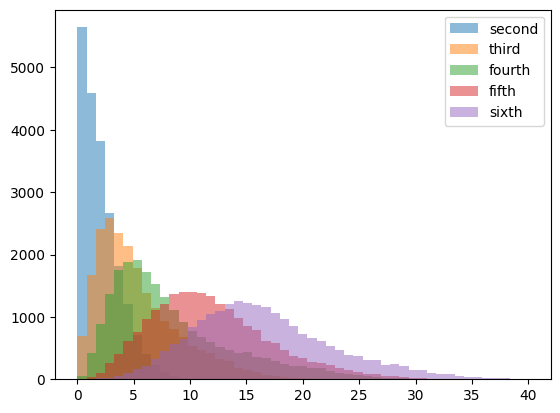

In [148]:
plt.hist(second_best, bins=np.linspace(0,40), alpha=.5, label="second")
plt.hist(third_best, bins=np.linspace(0,40), alpha=.5, label="third")
plt.hist(fourth_best, bins=np.linspace(0,40), alpha=.5, label="fourth")
plt.hist(fifth_best, bins=np.linspace(0,40), alpha=.5, label="fifth")
plt.hist(sixth_best, bins=np.linspace(0,40), alpha=.5, label="sixth")
plt.legend()
plt.show()

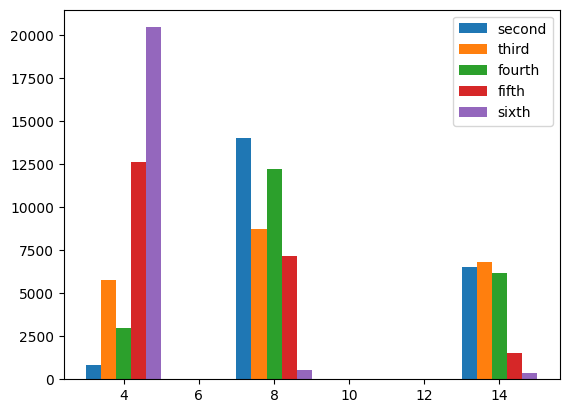

In [150]:
plt.hist([second_best_choice, third_best_choice, fourth_best_choice, fifth_best_choice, sixth_best_choice], bins=6, label=["second", "third", "fourth", "fifth", "sixth"], rwidth=1)
#plt.hist(third_best_choice, bins=np.linspace(0,40), histtype="barstacked", label="third")
#plt.hist(fourth_best_choice, bins=np.linspace(0,40), alpha=.5)
#plt.hist(fifth_best_choice, bins=np.linspace(0,40), alpha=.5)
#plt.hist(sixth_best_choice, bins=np.linspace(0,40), alpha=.5)
plt.legend()
plt.show()

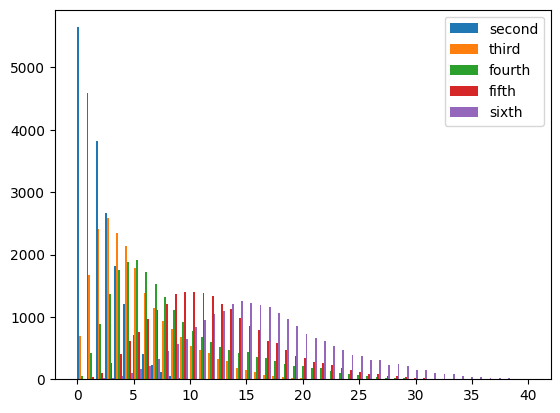

In [151]:
plt.hist([second_best, third_best, fourth_best, fifth_best, sixth_best], bins=np.linspace(0,40), label=["second", "third", "fourth", "fifth", "sixth"], rwidth=1)
#plt.hist(third_best_choice, bins=np.linspace(0,40), histtype="barstacked", label="third")
#plt.hist(fourth_best_choice, bins=np.linspace(0,40), alpha=.5)
#plt.hist(fifth_best_choice, bins=np.linspace(0,40), alpha=.5)
#plt.hist(sixth_best_choice, bins=np.linspace(0,40), alpha=.5)
plt.legend()
plt.show()

# Plotting

In [13]:
from src.ASD_predictability_utils.utils import plot_result

In [16]:

for key in list(refined_datas_dict.keys()):
    refined_datas_dict[key]["y_test_pred_init"] = datas_dict[key]["y_test_pred"]
    refined_datas_dict[key]["y_test_init"] = datas_dict[key]["y_test"]
    refined_datas_dict[key]["y_test_pred_linear"] = datas_dict[key]["y_test_pred_linear"]
    #refined_datas_dict[key]["y_test_init"] = datas_dict[key]["y_test"]


In [21]:
type(plot_result(refined_datas_dict, list(refined_datas_dict.keys())[0], plot_along=["init", "linear"]))

NoneType

##### dev

In [30]:
tuple_all_scores = pd.DataFrame.from_dict(datas_dict[list(datas_dict.keys())[0]]["scores"])[["param_knn__n_neighbors", "param_scaler", "mean_test_score", "std_test_score", "mean_train_score", "std_train_score"]].sort_values(by="mean_test_score", ascending=False).reset_index(drop=True)#.iloc[0]["mean_test_score"]
tuple_all_scores

,param_knn__n_neighbors,param_scaler,mean_test_score,std_test_score,mean_train_score,std_train_score
0,8,NaN,-18554.384364,1978.337935,-15575.073535,1026.865789
1,8,passthrough,-18646.625315,1810.306212,-15955.547648,899.886522
2,15,NaN,-18818.524746,1665.139713,-16530.761800,1573.972688
3,3,NaN,-19415.019339,1162.344417,-13959.921735,857.331426
4,15,passthrough,-19434.520658,1331.769172,-16895.525809,942.370402
5,3,passthrough,-21094.119611,2080.082128,-13512.746097,617.201795


In [37]:
tuple_all_scores["percent_worse_than_best"] = (1-(tuple_all_scores.loc[0, "mean_test_score"] / tuple_all_scores.loc[0:, "mean_test_score"]))*100

In [38]:
tuple_all_scores

,param_knn__n_neighbors,param_scaler,mean_test_score,std_test_score,mean_train_score,std_train_score,worse_than_best,percent_worse_than_best
0,8,NaN,-18554.384364,1978.337935,-15575.073535,1026.865789,0.000000,0.000000
1,8,passthrough,-18646.625315,1810.306212,-15955.547648,899.886522,0.004947,0.494679
2,15,NaN,-18818.524746,1665.139713,-16530.761800,1573.972688,0.014036,1.403619
3,3,NaN,-19415.019339,1162.344417,-13959.921735,857.331426,0.044328,4.432831
4,15,passthrough,-19434.520658,1331.769172,-16895.525809,942.370402,0.045287,4.528727
5,3,passthrough,-21094.119611,2080.082128,-13512.746097,617.201795,0.120400,12.040015
